In [1]:
from math import pi
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cpl_main as cpl

In [2]:
team_ref = pd.read_csv('datasets/teams.csv')

In [3]:
year = input('enter the year: ')

enter the year: 2019


In [4]:
results = pd.read_csv(f'datasets/{year}/cpl-{year}-results.csv')
stats = pd.read_csv(f'datasets/{year}/cpl-{year}-stats.csv')
player_info = pd.read_csv(f'datasets/{year}/player-{year}-info.csv')

In [5]:
prev_rated_forwards = pd.read_csv(f'datasets/{year}/cpl-{year}-forwards.csv')
prev_rated_midfielders = pd.read_csv(f'datasets/{year}/cpl-{year}-midfielders.csv')
prev_rated_defenders = pd.read_csv(f'datasets/{year}/cpl-{year}-defenders.csv')
prev_rated_goalscorers = pd.read_csv(f'datasets/{year}/cpl-{year}-rated_goalscorers.csv')
prev_rated_keepers = pd.read_csv(f'datasets/{year}/cpl-{year}-keepers.csv')

In [6]:
if year == '2019':
    team_ref = team_ref[1:]
    results_old = results[:-7].copy()
else:
    results_old = results[results['hr'] != 'E'].copy()

In [7]:
results.head(5)

,game,s,d,m,hs,as,home,hr,away,ar,csh,csa,combined,venue,links
0,I1,0,27,4,1,1,Forge FC,D,York9 FC,D,0,0,4-27-2019 Forge FC D 1-1 D York9 FC,Tim Hortons Field,https://canpl.ca/matchcentre/4ilfbdmlp4zuj7k3c...
1,I2,0,28,4,1,0,Pacific FC,W,HFX Wanderers FC,L,1,0,4-28-2019 Pacific FC W 1-0 L HFX Wanderers FC,Westhills Stadium,https://canpl.ca/matchcentre/4itgc6bq5l5c7iv5k...
2,I3,0,1,5,1,2,Pacific FC,L,Valour FC,W,0,0,5-1-2019 Pacific FC L 1-2 W Valour FC,Westhills Stadium,https://canpl.ca/matchcentre/4j6hzym2ji5zgrm0w...
3,I4,0,4,5,2,1,HFX Wanderers FC,W,Forge FC,L,0,0,5-4-2019 HFX Wanderers FC W 2-1 L Forge FC,Wanderers Grounds,https://canpl.ca/matchcentre/4jopa68wp2k7cntkj...
4,I5,0,4,5,2,1,Cavalry FC,W,York9 FC,L,0,0,5-4-2019 Cavalry FC W 2-1 L York9 FC,ATCO Field,https://canpl.ca/matchcentre/4kj2hnlgvv3ncwouf...


In [8]:
results_old.head(5)

,game,s,d,m,hs,as,home,hr,away,ar,csh,csa,combined,venue,links
0,I1,0,27,4,1,1,Forge FC,D,York9 FC,D,0,0,4-27-2019 Forge FC D 1-1 D York9 FC,Tim Hortons Field,https://canpl.ca/matchcentre/4ilfbdmlp4zuj7k3c...
1,I2,0,28,4,1,0,Pacific FC,W,HFX Wanderers FC,L,1,0,4-28-2019 Pacific FC W 1-0 L HFX Wanderers FC,Westhills Stadium,https://canpl.ca/matchcentre/4itgc6bq5l5c7iv5k...
2,I3,0,1,5,1,2,Pacific FC,L,Valour FC,W,0,0,5-1-2019 Pacific FC L 1-2 W Valour FC,Westhills Stadium,https://canpl.ca/matchcentre/4j6hzym2ji5zgrm0w...
3,I4,0,4,5,2,1,HFX Wanderers FC,W,Forge FC,L,0,0,5-4-2019 HFX Wanderers FC W 2-1 L Forge FC,Wanderers Grounds,https://canpl.ca/matchcentre/4jopa68wp2k7cntkj...
4,I5,0,4,5,2,1,Cavalry FC,W,York9 FC,L,0,0,5-4-2019 Cavalry FC W 2-1 L York9 FC,ATCO Field,https://canpl.ca/matchcentre/4kj2hnlgvv3ncwouf...


In [9]:
results_diff = pd.concat([results, results_old]).drop_duplicates(keep=False)

In [10]:
results_diff.head(2)

,game,s,d,m,hs,as,home,hr,away,ar,csh,csa,combined,venue,links
93,I94,1,16,10,0,4,Valour FC,L,York9 FC,W,0,1,10-16-2019 Valour FC L 0-4 W York9 FC,IG Field,https://canpl.ca/matchcentre/5oyl3jwgr2padsvpk...
94,I95,1,16,10,3,1,FC Edmonton,W,Pacific FC,L,0,0,10-16-2019 FC Edmonton W 3-1 L Pacific FC,Clarke Stadium,https://canpl.ca/matchcentre/5nw6ub2q95ptd6n71...


In [11]:
schedule = cpl.get_schedule(results_diff)
schedule

,game,home,away
0,I94,Valour FC,York9 FC
1,I95,FC Edmonton,Pacific FC
2,I96,York9 FC,HFX Wanderers FC
3,I97,Cavalry FC,FC Edmonton
4,I98,Pacific FC,Valour FC


In [12]:
team1, team2, team3, team4, team5, team6, team7, team8 = cpl.get_team_files(schedule,team_ref)

In [13]:
print(team1, team2, team3, team4, team5, team6, team7, team8)

VFC Y9 FCE PFC Y9 HFX CFC FCE


In [14]:
standings = cpl.get_standings(results,1,team_ref)
if results_old.empty == True:
    standings_old = cpl.get_standings(results,1,team_ref)
else:
    standings_old = cpl.get_standings(results_old,1,team_ref)

In [15]:
standings

,rank,team,gp,pts,tpp,ppg,w,l,d,gd,gf,ga,gfh,gah,gfa,gaa
0,1,Cavalry FC,28,62,84,2.21,19,4,5,32,51,19,26,8,25,11
1,2,Forge FC,28,56,84,2.00,17,6,5,19,45,26,25,10,20,16
2,3,York9 FC,28,34,84,1.21,9,12,7,2,39,37,18,19,21,18
3,4,FC Edmonton,28,32,84,1.14,8,12,8,-6,27,33,15,14,12,19
4,5,Pacific FC,28,31,84,1.11,8,13,7,-11,35,46,22,20,13,26
5,6,Valour FC,28,28,84,1.00,8,16,4,-22,30,52,17,32,13,20
6,7,HFX Wanderers FC,28,28,84,1.00,6,12,10,-14,21,35,13,9,8,26


In [16]:
standings_old

,rank,team,gp,pts,tpp,ppg,w,l,d,gd,gf,ga,gfh,gah,gfa,gaa
0,1,Cavalry FC,27,59,81,2.19,18,4,5,30,48,18,23,7,25,11
1,2,Forge FC,28,56,84,2.00,17,6,5,19,45,26,25,10,20,16
2,3,York9 FC,26,31,78,1.19,8,11,7,0,35,35,18,17,17,18
3,4,FC Edmonton,26,29,78,1.12,7,11,8,-6,23,29,12,13,11,16
4,5,Valour FC,26,28,78,1.08,8,14,4,-16,30,46,17,28,13,18
5,6,Pacific FC,26,28,78,1.08,7,12,7,-11,32,43,20,20,12,23
6,7,HFX Wanderers FC,27,25,81,0.93,5,12,10,-16,19,35,13,9,6,26


In [17]:
def get_team_graphs(stats,standings):
    comparing = standings.sort_values(by=['team'])
    
    def get_column_overall(lst):
        data = stats[lst]
        data = data.groupby(['team']).sum()
        data['overall'] = data.sum(axis=1) / data.shape[1]
        data['overall'] = data['overall'] / data['overall'].max()
        data['overall'] = data['overall'] - 0.1
        data = data[['overall']]
        data = data.reset_index()
        data.pop('team')
        return data['overall']
    
    offense = get_column_overall(['team','goals','chances','assists','shots','s-target','passes','crosses','duels','tackles'])
    central = get_column_overall(['team','goals','assists','touches','passes','pass-acc','crosses','cross-acc','chances','duels','tackles'])
    defense = get_column_overall(['team','tackles','t-won','clearances','interceptions','duels','d-won'])
    keeping = get_column_overall(['team','cs','saves','shots faced','claimed crosses'])
    
    g_cols = ['chances','goals','assists','pass-acc','cross-acc','shots','s-target','s-box','s-out-box','clearances','interceptions','yellow','shots faced','claimed crosses','cs']
    team_mean = stats.copy()
    goals = stats[['team','goals']]
    assists = stats[['team','assists']]
    team_mean = team_mean.select_dtypes(include=['float'])
    team_mean.insert(0,'team',stats['team'])
    try:
        team_mean = team_mean.groupby(['team']).mean()
    except:
        teams = stats.team.unique()
        team_mean = pd.DataFrame(columns=['team','clean sheets','big chances','attacking plays','combination plays','accuracy','defending','chance creation','finishing'])
        team_mean['team'] = teams
        for col in team_mean.columns:
            if col == 'team':
                continue
            else:
                team_mean[col] = 0.5
        return team_mean

    team_mean = team_mean[g_cols]
    team_mean['claimed crosses'] = team_mean['claimed crosses'] * 15
    team_mean['cs'] = team_mean['cs'] * 100
    team_mean['goals'] = goals.groupby(['team']).sum()
    team_mean['assists'] = assists.groupby(['team']).sum()
    team_mean['big chances'] = (team_mean['goals'] + 2) / team_mean['chances']
    team_mean['attacking plays'] = (team_mean['assists'] + 2) / team_mean['chances']
    team_mean['combination plays'] = team_mean['assists'] / team_mean['goals'] * 100
    team_mean['offense'] = comparing['gf'].values / offense.values
    team_mean['midfield'] = comparing['gd'].values * central.values + comparing['gd'].max()
    team_mean['defending'] = 100 - (comparing['ga'].values * defense.values)
    team_mean['chance creation'] = (team_mean['shots'] + team_mean['s-box'] + team_mean['s-out-box']) * team_mean['s-target'] * 100
    team_mean['finishing'] = team_mean['chance creation'] * team_mean['goals']
    team_mean = team_mean.rename(columns={'cs':'clean sheets'})

    for col in team_mean.columns:
        if team_mean[col].max() > 1.0:
            team_mean[col] = team_mean[col] / team_mean[col].max()
        if team_mean[col].max() < 0.2:
            team_mean[col] = team_mean[col] * 5
        else:
            continue
    for col in team_mean.columns:
        team_mean[col] = team_mean[col] - 0.1
    
    team_mean = team_mean[['clean sheets','big chances','attacking plays','combination plays','offense','midfield','defending','chance creation','finishing']]
    team_mean = team_mean.reset_index()
    return team_mean

In [18]:
team_graphs = get_team_graphs(stats,standings)
team_graphs

,team,clean sheets,big chances,attacking plays,combination plays,offense,midfield,defending,chance creation,finishing
0,Cavalry FC,0.825833,0.900000,0.750245,0.681250,0.900000,0.900000,0.900000,0.710718,0.900000
1,FC Edmonton,0.505827,0.559253,0.556867,0.813462,0.474212,0.358825,0.780348,0.375840,0.217924
2,Forge FC,0.900000,0.831001,0.900000,0.900000,0.751521,0.727480,0.826411,0.631668,0.746089
3,HFX Wanderers FC,0.525111,0.365814,0.253622,0.557895,0.396694,0.268709,0.723495,0.469590,0.178102
4,Pacific FC,0.332734,0.698559,0.645492,0.757143,0.587071,0.280210,0.618300,0.444518,0.389744
5,Valour FC,0.417949,0.536581,0.560705,0.858333,0.568960,0.160282,0.583402,0.549599,0.400790
6,York9 FC,0.423316,0.520303,0.449385,0.710811,0.629234,0.469593,0.714522,0.900000,0.850804


In [19]:
def make_radar(data,team_ref,year):
    team = data['team']
    info = team_ref[team_ref['team'] == team]
    colour1 = info['colour1'].values
    colour1 = colour1[0]
    colour2 = info['colour2'].values
    colour2 = colour2[0]
    # number of variable
    categories=list(team_graphs)[1:]
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = data.drop('team').values.flatten().tolist()
    values += values[:1]
    values

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    #plt.figure(figsize=(8,8))
    plt.figure(figsize=(8,8), dpi=80, facecolor='#343148',edgecolor='#343148')
    ax = plt.subplot(111, polar=True)
    ax.set_facecolor('#343148')

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='white', size=14)

    # Draw ylabels
    ax.set_title(data['team'], color=colour2, size=24)
    ax.set_rlabel_position(0)
    plt.yticks([0.25,0.5,0.75], ["0.25","0.50","0.75"], color='white', size=12)
    plt.ylim(0,1)
    # Plot data
    ax.plot(angles, values, linewidth=8, linestyle='solid', color=colour2)

    # Fill area
    ax.fill(angles, values, colour2, alpha=0.5)
    
    filename = f'static/images/{year}/cpl-{year}-{team}-radar.png'
    plt.savefig(filename, facecolor= '#343148',edgecolor='#343148')

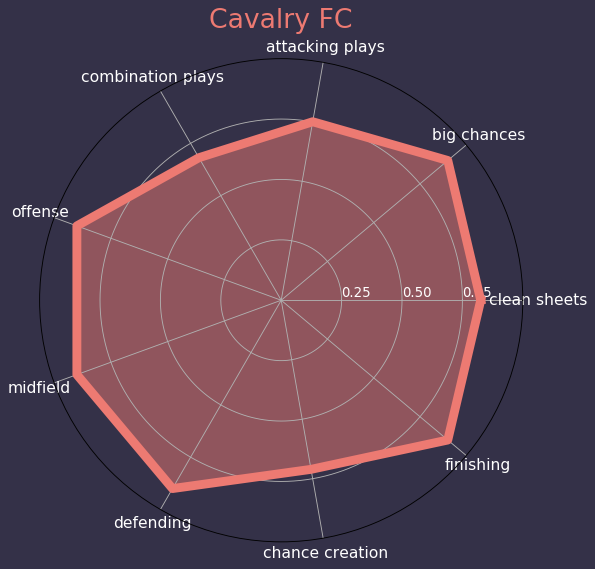

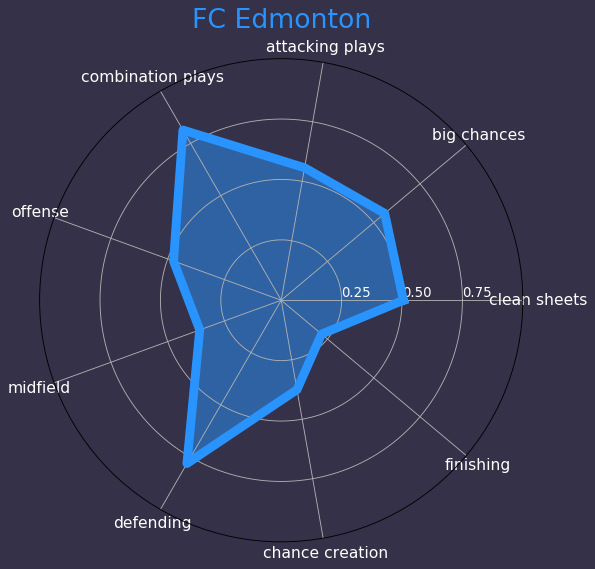

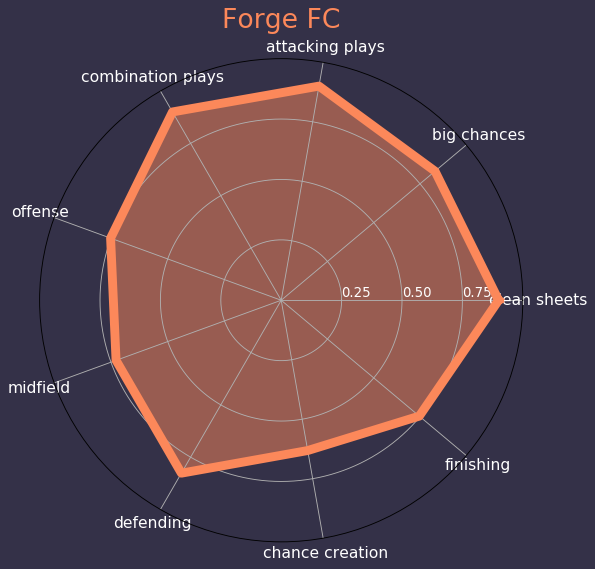

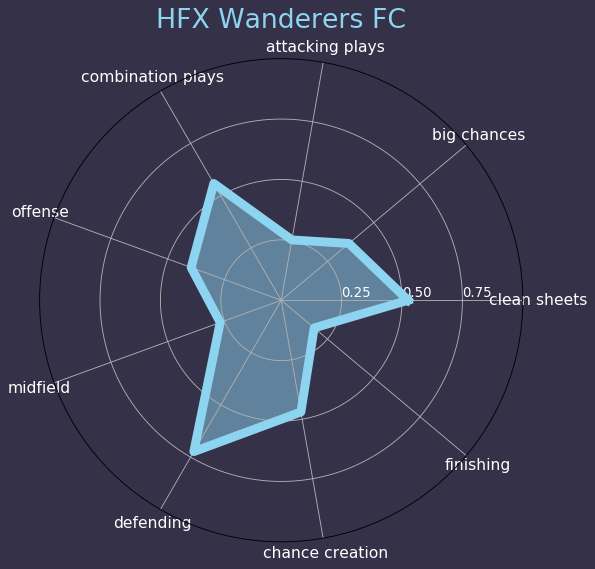

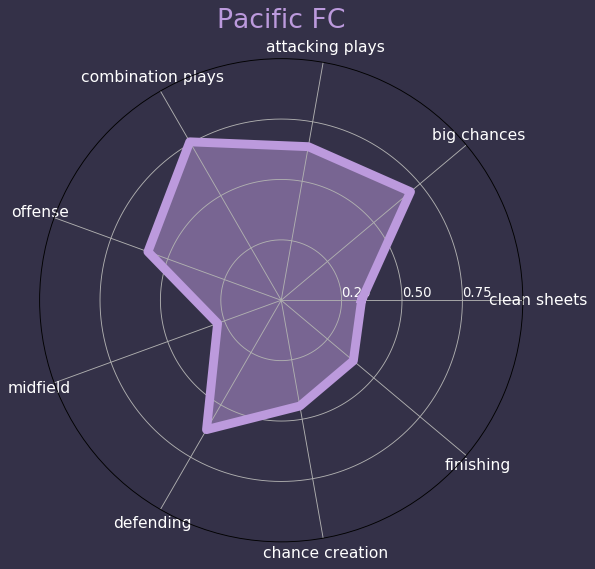

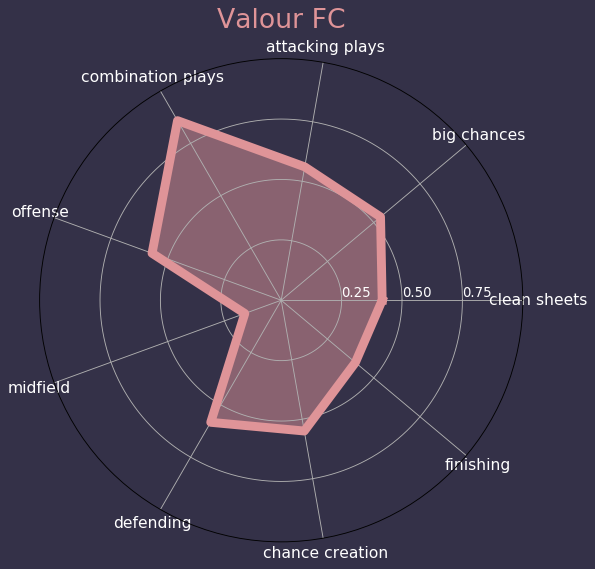

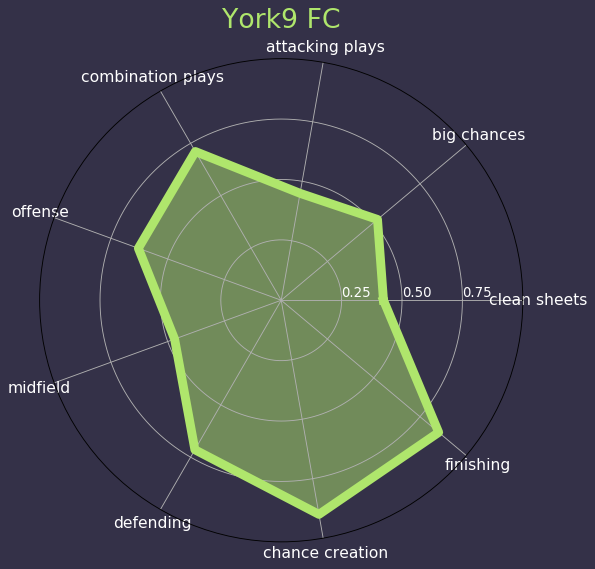

In [20]:
for i in range(team_graphs.shape[0]):
    make_radar(team_graphs.loc[i],team_ref,year)

In [21]:
compare_standings_test = cpl.compare_standings(standings,standings_old,team_ref)

In [22]:
compare_standings_test

,team,change
0,Pacific FC,1
1,Cavalry FC,0
2,FC Edmonton,0
3,Forge FC,0
4,HFX Wanderers FC,0
5,York9 FC,0
6,Valour FC,-1


In [23]:
previous_rankings = pd.read_csv(f'datasets/{year}/cpl-{year}-power_rankings.csv')
#previous_rankings.to_csv(f'datasets/{year}/cpl-{year}-previous_rankings.csv',index=False)

In [24]:
power_rankings = cpl.get_power_rankings(standings,standings_old,team_ref,results,previous_rankings)
power_rankings

,rank,team,form,old_rank,change,goal_bonus,w_bonus,crest,colour,previous
0,1,Cavalry FC,2-2-1,1,6,1,1,cavalry_fc_nav.png,cpl-cfc,0
1,2,Forge FC,2-2-1,2,3,0,0,Forge_FC_nav.png,cpl-ffc,0
2,3,HFX Wanderers FC,1-2-2,3,3,2,1,HFX_Wanderers_FC.png,cpl-hfx,0
3,4,York9 FC,3-2-0,4,3,0,1,York_9_FC_nav.png,cpl-y9,0
4,5,FC Edmonton,0-3-2,5,-3,-4,1,FC_Edmonton_nav.png,cpl-fce,0
5,6,Pacific FC,0-3-2,6,-3,-3,1,Pacific_FC_nav.png,cpl-pfc,0
6,7,Valour FC,1-3-1,7,-11,-12,0,Valour_FC_nav.png,cpl-vfc,0


In [25]:
game_week, goals, big_win, top_result, low_result,other_result = cpl.get_weeks_results(results[results['s'] <= 1],standings,team_ref)
game_week

,game,s,d,m,hs,as,home,hr,away,ar,csh,csa,combined,venue,links
97,I98,1,19,10,2,0,Pacific FC,W,Valour FC,L,1,0,10-19-2019 Pacific FC W 2-0 L Valour FC,Westhills Stadium,https://canpl.ca/matchcentre/5opkqc01qgmjdcbho...
96,I97,1,19,10,3,1,Cavalry FC,W,FC Edmonton,L,0,0,10-19-2019 Cavalry FC W 3-1 L FC Edmonton,ATCO Field,https://canpl.ca/matchcentre/5nw6ub2q95ptd6n71...
95,I96,1,19,10,0,2,York9 FC,L,HFX Wanderers FC,W,0,1,10-19-2019 York9 FC L 0-2 W HFX Wanderers FC,York Lions Stadium,https://canpl.ca/matchcentre/5opkqc01qgmjdcbho...
94,I95,1,16,10,3,1,FC Edmonton,W,Pacific FC,L,0,0,10-16-2019 FC Edmonton W 3-1 L Pacific FC,Clarke Stadium,https://canpl.ca/matchcentre/5nw6ub2q95ptd6n71...
93,I94,1,16,10,0,4,Valour FC,L,York9 FC,W,0,1,10-16-2019 Valour FC L 0-4 W York9 FC,IG Field,https://canpl.ca/matchcentre/5oyl3jwgr2padsvpk...
92,I93,1,16,10,1,0,Forge FC,W,Cavalry FC,L,1,0,10-16-2019 Forge FC W 1-0 L Cavalry FC,Tim Hortons Field,https://canpl.ca/matchcentre/5nossz36w45wbtz1z...


In [26]:
#championship = get_standings(results,2)
#championship = championship[championship['gp'] > 1]
#championship

In [27]:
#championship.to_csv(f'datasets/{year}/cpl-{year}-championship.csv',index=False)

In [28]:
#standings.to_csv(f'datasets/{year}/cpl-{year}-standings.csv',index=False)

In [29]:
results_brief = cpl.get_results_brief(results,team_ref)

In [30]:
results_brief.head(5)

,d,m,hs,as,home,hr,away,ar,summary,team
0,4,5,2,1,Cavalry FC,W,York9 FC,L,W H 2 - 1 Y9,Cavalry FC
1,8,5,1,0,Cavalry FC,W,Valour FC,L,W H 1 - 0 VFC,Cavalry FC
2,12,5,1,2,Forge FC,L,Cavalry FC,W,W A 1 - 2 FFC,Cavalry FC
3,18,5,1,0,Cavalry FC,W,FC Edmonton,L,W H 1 - 0 FCE,Cavalry FC
4,25,5,2,0,Cavalry FC,W,HFX Wanderers FC,L,W H 2 - 0 HFX,Cavalry FC


In [31]:
#results_brief.to_csv(f'datasets/{year}/cpl-{year}-results_brief.csv',index=False)

In [32]:
stats.head(5)

,game,team,position,number,name,first,last,minutes,touches,passes,...,clearances,interceptions,yellow,red,f-won,f-conceded,shots faced,saves,claimed crosses,cs
0,I1,Forge FC,m,1,Alexander Achinioti-Jönsson,Alexander,Achinioti-Jönsson,77.0,47.0,41.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,I1,Forge FC,d,16,Bertrand Owundi,Bertrand,Owundi,77.0,69.0,56.0,...,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,I1,Forge FC,f,13,Christopher Nanco,Christopher,Nanco,56.0,42.0,27.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,I1,Forge FC,d,22,Dominic Samuel,Dominic,Samuel,90.0,59.0,48.0,...,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,I1,Forge FC,m,6,Elimane Cissé,Elimane,Cissé,90.0,75.0,61.0,...,1.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [33]:
stats.describe()

,number,minutes,touches,passes,pass-acc,crosses,cross-acc,assists,chances,goals,...,clearances,interceptions,yellow,red,f-won,f-conceded,shots faced,saves,claimed crosses,cs
count,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,...,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000
mean,13.829250,71.540768,44.576965,30.244241,0.736570,1.116271,0.093119,0.060695,0.628154,0.087751,...,1.210238,0.790128,0.112249,0.006216,0.938574,0.995978,0.318099,0.227422,0.036563,0.019744
std,11.355872,28.545983,23.277512,18.645196,0.233204,1.904354,0.235873,0.246352,0.989120,0.311297,...,1.859761,1.131050,0.315730,0.078609,1.119698,1.125445,1.295603,0.956352,0.251072,0.139145
min,1.000000,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,61.000000,28.000000,16.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,90.000000,45.000000,29.000000,0.780000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,19.000000,90.000000,61.000000,42.000000,0.850000,2.000000,0.000000,0.000000,1.000000,0.000000,...,2.000000,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
max,92.000000,90.000000,118.000000,112.000000,1.000000,15.000000,1.000000,2.000000,7.000000,3.000000,...,11.000000,7.000000,1.000000,1.000000,6.000000,7.000000,13.000000,10.000000,4.000000,1.000000


In [34]:
team_stats = cpl.get_stats_all(stats,team_ref)

In [35]:
team_stats.describe()

,number,minutes,touches,passes,pass-acc,crosses,cross-acc,assists,chances,goals,...,clearances,interceptions,yellow,red,f-won,f-conceded,shots faced,saves,claimed crosses,cs
count,164.00000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,...,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,15.00000,1193.073171,743.402439,504.378049,0.734939,18.615854,0.061890,1.012195,10.475610,1.463415,...,20.182927,13.176829,1.871951,0.103659,15.652439,16.609756,5.304878,3.792683,0.609756,0.329268
std,12.78947,694.973598,500.156058,367.663695,0.224651,28.796174,0.200023,1.356592,11.323168,2.509834,...,25.700793,13.268319,1.796914,0.305751,13.363073,12.806015,19.381662,13.906557,2.492965,1.325122
min,1.00000,9.000000,10.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.00000,560.000000,322.500000,198.750000,0.670000,1.000000,0.000000,0.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,0.000000,5.000000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,13.00000,1243.000000,664.000000,453.500000,0.770000,6.000000,0.000000,0.000000,7.000000,0.000000,...,9.000000,9.000000,2.000000,0.000000,12.000000,14.000000,0.000000,0.000000,0.000000,0.000000
75%,20.00000,1775.000000,1134.750000,824.250000,0.860000,22.000000,0.000000,2.000000,16.000000,2.000000,...,27.250000,21.000000,3.000000,0.000000,23.250000,24.000000,0.000000,0.000000,0.000000,0.000000
max,92.00000,2520.000000,1985.000000,1536.000000,1.000000,164.000000,1.000000,5.000000,66.000000,13.000000,...,117.000000,51.000000,9.000000,1.000000,57.000000,62.000000,122.000000,88.000000,17.000000,9.000000


In [36]:
rated_goalscorers = cpl.top_tracked(team_stats,'goals')
rated_assists = cpl.top_tracked(team_stats,'assists')

In [37]:
rated_assists

,rank,team,name,position,number,minutes,assists
0,1,PFC,Blake Smith,d,4,2004,5
1,2,VFC,Michael Petrasso,m,9,1301,5
2,3,PFC,Ben Fisk,m,21,1662,5
3,4,FFC,Tristan Borges,m,4,1884,5
4,5,FFC,Kyle Bekker,m,3,2354,5
...,...,...,...,...,...,...,...
74,75,CFC,Nathan Mavila,d,3,1952,1
75,76,Y9,Emmanuel Zambazis,m,14,277,1
76,77,FFC,Jonathan Grant,d,8,822,1
77,78,FCE,Marcus Velado-Tsegaye,f,17,487,1


In [38]:
rated_assists.describe()

,rank,number,minutes,assists
count,79.000000,79.000000,79.000000,79.000000
mean,40.000000,13.632911,1405.696203,2.101266
std,22.949219,11.626867,603.860728,1.236153
min,1.000000,1.000000,77.000000,1.000000
25%,20.500000,6.500000,994.500000,1.000000
50%,40.000000,11.000000,1530.000000,2.000000
75%,59.500000,18.000000,1877.500000,3.000000
max,79.000000,77.000000,2381.000000,5.000000


In [39]:
rated_goalscorers.describe()

,rank,number,minutes,goals
count,76.000000,76.000000,76.000000,76.000000
mean,38.500000,13.578947,1423.894737,3.157895
std,22.083176,7.180089,637.472647,2.875425
min,1.000000,2.000000,137.000000,1.000000
25%,19.750000,8.750000,1010.250000,1.000000
50%,38.500000,12.500000,1490.000000,2.000000
75%,57.250000,17.250000,1926.500000,4.250000
max,76.000000,45.000000,2520.000000,13.000000


In [40]:
rated_forwards = cpl.top_position(team_stats,'f')
rated_midfielders = cpl.top_position(team_stats,'m')
rated_defenders = cpl.top_position(team_stats,'d')
rated_keepers = cpl.top_position(team_stats,'g')
rated_offenders = cpl.top_offenders(team_stats)

/home/todd/Documents/git/canpl-es/cpl_main.py:396: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condensed_player_info['overall'] = 0.0 # create the final column overall


In [41]:
rated_forwards.head(10)

,team,name,number,position,minutes,goals,chances,assists,shots,s-target,passes,crosses,duels,tackles,overall
0,PFC,Terran Campbell,14,f,2334,11,31,2,53,23,569,29,324,39,0.80
1,HFX,Mohamed Kourouma,12,f,1988,1,44,3,68,17,702,156,264,56,0.77
2,CFC,Nico Pasquotti,17,f,1853,5,24,3,33,16,457,61,374,47,0.73
3,Y9,Rodrigo Gattas,22,f,1958,9,23,0,77,36,728,38,214,17,0.70
4,CFC,Dominique Malonga,19,f,1871,11,19,1,68,34,489,5,185,2,0.64
5,FCE,Oumar Diouck,45,f,1977,6,30,2,45,16,583,53,269,36,0.60
6,FCE,Easton Ongaro,19,f,1167,10,11,2,38,20,249,6,188,5,0.52
7,FFC,Anthony Novak,23,f,1027,6,14,3,24,13,235,3,169,10,0.48
8,Y9,Simon Karlsson Adjei,12,f,1422,7,21,2,53,16,341,4,210,15,0.47
9,CFC,Oliver Minatel,7,f,1450,7,17,1,37,12,348,21,194,29,0.43


In [42]:
rated_midfielders.head(10)

,team,name,number,position,minutes,goals,assists,touches,passes,pass-acc,crosses,cross-acc,chances,duels,tackles,overall
0,VFC,Marco Bustos,22,m,2249,7,3,1417,912,0,74,0,43,299,22,0.91
1,FFC,Tristan Borges,4,m,1884,13,5,1307,680,0,77,0,42,356,59,0.90
2,CFC,Julian Büscher,8,m,1678,5,4,1432,971,0,113,0,38,282,57,0.87
3,Y9,Ryan Telfer,18,m,2216,8,1,1533,832,0,164,0,66,372,52,0.79
4,FFC,Kyle Bekker,3,m,2354,4,5,1748,1362,0,98,0,44,173,23,0.77
5,PFC,Victor Blasco,19,m,1586,6,3,1040,589,0,47,0,27,349,43,0.72
6,PFC,Ben Fisk,21,m,1662,6,5,859,546,0,65,0,29,153,28,0.69
7,CFC,Elijah Adekugbe,16,m,1575,1,4,1185,949,0,10,0,12,196,42,0.67
8,CFC,Sergio Camargo,10,m,1171,6,3,580,359,0,20,0,22,134,16,0.67
9,Y9,Kyle Porter,19,m,1916,2,4,1131,729,0,88,0,31,216,47,0.65


In [43]:
rated_defenders.head(10)

,team,name,number,position,minutes,tackles,t-won,clearances,interceptions,duels,d-won,overall
0,FCE,Mélé Temguia,8,d,2430,61,41,82,51,244,140,0.96
1,Y9,Luca Gasparotto,13,d,2520,31,24,117,49,254,182,0.93
2,HFX,André Bona,3,d,2053,66,50,76,32,257,150,0.93
3,CFC,Dominick Zator,4,d,2335,46,32,75,51,265,169,0.92
4,Y9,Diyaeddine Abzi,20,d,1814,48,35,31,48,267,134,0.92
5,FFC,Kwame Awuah,2,d,1885,57,40,17,39,258,124,0.90
6,Y9,Morey Doner,3,d,2250,40,27,35,32,239,145,0.86
7,PFC,Kadin Chung,7,d,2032,57,42,42,31,203,111,0.79
8,HFX,Ndzemdzela Langwa,20,d,1281,65,47,20,14,272,154,0.77
9,CFC,Nathan Mavila,3,d,1952,51,32,42,20,257,134,0.75


In [44]:
rated_keepers

,team,name,number,position,minutes,cs,saves,shots faced,claimed crosses,overall
0,Y9,Nathan Ingham,1,g,2340,6,88,122,17,0.93
1,CFC,Marco Carducci,1,g,2160,9,65,81,11,0.79
2,FFC,Triston Henry,9,g,1890,8,53,70,12,0.71
3,FCE,Connor James,1,g,1980,6,67,91,9,0.70
4,VFC,Tyson Farago,1,g,1440,2,47,77,13,0.55
5,HFX,Christian Oxner,50,g,1489,5,41,56,10,0.54
6,PFC,Mark Village,1,g,1440,4,47,69,10,0.54
7,PFC,Nolan Wirth,6,g,1080,1,59,83,6,0.45
8,VFC,Mathias Janssens,26,g,1080,4,43,65,0,0.38
9,HFX,Jan-Michael Williams,21,g,1028,2,40,59,4,0.36


In [51]:
top_keeper = rated_keepers.sort_values(by=['cs'],ascending=False)
top_keeper = top_keeper.reset_index().loc[0]
top_keeper

index                           1
team                          CFC
name               Marco Carducci
number                          1
position                        g
minutes                      2160
cs                              9
saves                          65
shots faced                    81
claimed crosses                11
overall                      0.79
Name: 0, dtype: object

In [45]:
rated_offenders.head(2)

,team,name,position,number,minutes,yellow,red,f-conceded,overall
0,Y9,Manuel Aparicio,m,10,2159,5,1,56,0.82
1,FFC,Dominic Samuel,d,22,2044,5,1,38,0.74


In [46]:
best_eleven = cpl.get_best_eleven(team_stats,team_ref,rated_forwards,rated_midfielders,rated_defenders,rated_keepers,player_info)
best_eleven

,image,first,last,flag,number,position,overall,link
0,Nathan-Ingham.jpg,Nathan,Ingham,Canada.png,1,g,0.93,https://en.wikipedia.org/wiki/Nathan_Ingham
1,Mélé-Temguia.jpg,Mélé,Temguia,Germany.png,8,d,0.96,https://en.wikipedia.org/wiki/Mélé_Temguia
2,Luca-Gasparotto.jpg,Luca,Gasparotto,Canada.png,13,d,0.93,https://en.wikipedia.org/wiki/Luca_Gasparotto
3,André-Bona.jpg,André,Bona,France.png,3,d,0.93,https://en.wikipedia.org/wiki/André_Bona
4,Marco-Bustos.jpg,Marco,Bustos,Canada.png,22,m,0.91,https://en.wikipedia.org/wiki/Marco_Bustos
5,Tristan-Borges.jpg,Tristan,Borges,Canada.png,4,m,0.90,https://en.wikipedia.org/wiki/Tristan_Borges
6,Julian-Buscher.jpg,Julian,Büscher,Germany.png,8,m,0.87,https://en.wikipedia.org/wiki/Julian_Büscher
7,Ryan-Telfer.jpg,Ryan,Telfer,Canada.png,18,m,0.79,https://en.wikipedia.org/wiki/Ryan_Telfer
8,Kyle-Bekker.jpg,Kyle,Bekker,Canada.png,3,m,0.77,https://en.wikipedia.org/wiki/Kyle_Bekker
9,Terran-Campbell.jpg,Terran,Campbell,Canada.png,14,f,0.80,https://en.wikipedia.org/wiki/Terran_Campbell


In [47]:
# home side
q1 = schedule.iloc[3]['home']
# away side
q2 = schedule.iloc[3]['away']
print(q1,q2)

Cavalry FC FC Edmonton


In [48]:
compare = cpl.get_team_comparison(results_brief,q1,q2)

In [49]:
compare

,d,m,hs,as,home,hr,away,ar,summary,team
0,18,5,1,0,Cavalry FC,W,FC Edmonton,L,W H 1 - 0 FCE,Cavalry FC
1,15,6,0,3,FC Edmonton,L,Cavalry FC,W,W A 0 - 3 FCE,Cavalry FC
2,16,8,0,0,Cavalry FC,D,FC Edmonton,D,D H 0 - 0 FCE,Cavalry FC
3,11,9,0,1,FC Edmonton,L,Cavalry FC,W,W A 0 - 1 FCE,Cavalry FC
4,19,10,3,1,Cavalry FC,W,FC Edmonton,L,W H 3 - 1 FCE,Cavalry FC


In [50]:
t1_x, t1_y = cpl.get_NB_data(compare,q1)
t2_x, t2_y = cpl.get_NB_data(compare,q2)

In [51]:
home_win, draw, away_win = cpl.get_match_prediction(q1,q2,t1_x,t1_y,t2_x,t2_y)

In [52]:
print(q1,'\nwin probability: ', round(home_win,2))

Cavalry FC 
win probability:  0.66


In [53]:
print(q2,'\nwin probability: ', round(away_win,2))

FC Edmonton 
win probability:  0.19


In [54]:
print('Draw probability: ', round(draw,2))

Draw probability:  0.28


In [55]:
round(home_win + draw + away_win,1)

1.1

In [56]:
team_form_results = cpl.get_form_results(results,team_ref)
team_form_results

,index,0,1,2,3,4,5,6,7,8,...,18,19,20,21,22,23,24,25,26,27
0,Cavalry FC,W H 2 - 1 Y9,W H 1 - 0 VFC,W A 1 - 2 FFC,W H 1 - 0 FCE,W H 2 - 0 HFX,W A 0 - 3 FCE,W A 1 - 2 HFX,L H 0 - 1 FFC,W A 0 - 2 Y9,...,D H 1 - 1 PFC,W A 0 - 8 VFC,W A 0 - 1 FCE,W H 4 - 1 PFC,D A 1 - 1 Y9,W H 4 - 1 VFC,W H 2 - 0 HFX,W H 2 - 1 FFC,L A 1 - 0 FFC,W H 3 - 1 FCE
1,FC Edmonton,W A 1 - 2 VFC,D H 0 - 0 PFC,L A 1 - 0 CFC,L A 2 - 0 FFC,L H 0 - 1 VFC,L H 0 - 3 CFC,D A 0 - 0 Y9,W A 1 - 3 PFC,W H 1 - 0 FFC,...,D H 2 - 2 Y9,D A 0 - 0 HFX,L H 0 - 1 CFC,L A 1 - 0 PFC,L H 1 - 3 Y9,D A 1 - 1 HFX,L H 0 - 1 FFC,L A 3 - 1 VFC,W H 3 - 1 PFC,L A 3 - 1 CFC
2,Forge FC,D H 1 - 1 Y9,L A 2 - 1 HFX,W H 3 - 0 PFC,L H 1 - 2 CFC,W A 0 - 2 VFC,W A 0 - 2 Y9,W H 2 - 0 FCE,W H 2 - 1 VFC,W A 0 - 1 CFC,...,W H 2 - 1 Y9,W A 1 - 3 VFC,D H 2 - 2 HFX,D A 1 - 1 HFX,W H 3 - 0 PFC,W A 0 - 1 FCE,W H 1 - 0 Y9,L A 2 - 1 CFC,L A 4 - 0 Y9,W H 1 - 0 CFC
3,HFX Wanderers FC,L A 1 - 0 PFC,W H 2 - 1 FFC,L A 1 - 0 VFC,L A 2 - 0 CFC,D H 1 - 1 Y9,W H 2 - 1 PFC,L H 1 - 2 CFC,D A 0 - 0 Y9,W H 2 - 0 VFC,...,L A 2 - 0 VFC,D H 0 - 0 FCE,D A 2 - 2 FFC,D H 1 - 1 FFC,D H 0 - 0 VFC,D H 1 - 1 FCE,D A 1 - 1 PFC,L A 2 - 0 CFC,D H 1 - 1 PFC,W A 0 - 2 Y9
4,Pacific FC,W H 1 - 0 HFX,L H 1 - 2 VFC,L A 3 - 0 FFC,D A 0 - 0 FCE,D H 2 - 2 Y9,L A 2 - 1 HFX,L A 1 - 0 Y9,W A 1 - 2 VFC,L H 1 - 3 FCE,...,D A 1 - 1 CFC,D H 1 - 1 FFC,L H 0 - 2 Y9,W H 1 - 0 FCE,L A 4 - 1 CFC,L A 3 - 0 FFC,D H 1 - 1 HFX,D A 1 - 1 HFX,L A 3 - 1 FCE,W H 2 - 0 VFC
5,Valour FC,W A 1 - 2 PFC,L H 1 - 2 FCE,L A 1 - 0 CFC,W H 1 - 0 HFX,L H 0 - 2 FFC,W A 0 - 1 FCE,L A 2 - 1 FFC,L H 1 - 2 PFC,L A 2 - 0 HFX,...,L A 2 - 1 PFC,W H 2 - 0 HFX,L H 0 - 8 CFC,L H 1 - 3 FFC,W A 2 - 4 Y9,D A 0 - 0 HFX,L A 4 - 1 CFC,W H 3 - 1 FCE,L H 0 - 4 Y9,L A 2 - 0 PFC
6,York9 FC,D A 1 - 1 FFC,L A 2 - 1 CFC,D A 2 - 2 PFC,L H 0 - 2 FFC,D A 1 - 1 HFX,W H 1 - 0 PFC,D H 0 - 0 FCE,D H 0 - 0 HFX,L H 0 - 2 CFC,...,D A 2 - 2 FCE,L A 2 - 1 FFC,W A 0 - 2 PFC,L H 2 - 4 VFC,W A 1 - 3 FCE,D H 1 - 1 CFC,L A 1 - 0 FFC,W H 4 - 0 FFC,W A 0 - 4 VFC,L H 0 - 2 HFX


In [57]:
player_info_new = cpl.update_player_info(year,player_info,rated_forwards,rated_midfielders,rated_defenders,rated_keepers)

In [58]:
rated_forwards

,team,name,number,position,minutes,goals,chances,assists,shots,s-target,passes,crosses,duels,tackles,overall
0,PFC,Terran Campbell,14,f,2334,11,31,2,53,23,569,29,324,39,0.80
1,HFX,Mohamed Kourouma,12,f,1988,1,44,3,68,17,702,156,264,56,0.77
2,CFC,Nico Pasquotti,17,f,1853,5,24,3,33,16,457,61,374,47,0.73
3,Y9,Rodrigo Gattas,22,f,1958,9,23,0,77,36,728,38,214,17,0.70
4,CFC,Dominique Malonga,19,f,1871,11,19,1,68,34,489,5,185,2,0.64
5,FCE,Oumar Diouck,45,f,1977,6,30,2,45,16,583,53,269,36,0.60
6,FCE,Easton Ongaro,19,f,1167,10,11,2,38,20,249,6,188,5,0.52
7,FFC,Anthony Novak,23,f,1027,6,14,3,24,13,235,3,169,10,0.48
8,Y9,Simon Karlsson Adjei,12,f,1422,7,21,2,53,16,341,4,210,15,0.47
9,CFC,Oliver Minatel,7,f,1450,7,17,1,37,12,348,21,194,29,0.43


In [61]:
standings.to_csv(f'datasets/{year}/cpl-{year}-standings.csv',index=False)
#championship.to_csv(f'datasets/{year}/cpl-{year}-championship.csv',index=False)
power_rankings.to_csv(f'datasets/{year}/cpl-{year}-power_rankings.csv',index=False)
results_brief.to_csv(f'datasets/{year}/cpl-{year}-results_brief.csv',index=False)
schedule.to_csv(f'datasets/{year}/cpl-{year}-schedule.csv',index=False)
team_stats.to_csv(f'datasets/{year}/cpl-{year}-team_stats.csv',index=False)

In [62]:
rated_forwards.to_csv(f'datasets/{year}/cpl-{year}-forwards.csv',index=False)
rated_midfielders.to_csv(f'datasets/{year}/cpl-{year}-midfielders.csv',index=False)
rated_defenders.to_csv(f'datasets/{year}/cpl-{year}-defenders.csv',index=False)
rated_keepers.to_csv(f'datasets/{year}/cpl-{year}-keepers.csv',index=False)
rated_offenders.to_csv(f'datasets/{year}/cpl-{year}-discipline.csv',index=False)
rated_goalscorers.to_csv(f'datasets/{year}/cpl-{year}-rated_goalscorers.csv',index=False)
rated_assists.to_csv(f'datasets/{year}/cpl-{year}-rated_assists.csv',index=False)

In [30]:
team_form_results.to_csv(f'datasets/{year}/cpl-{year}-team_form.csv',index=False)
#h1_roster.to_csv(f'datasets/{year}/teams/cpl-{year}-{q1}_final_scores.csv')
team_form_results.to_csv(f'datasets/{year}/cpl-{year}-team_form.csv',index=False)
best_eleven.to_csv(f'datasets/{year}/cpl-{year}-best_eleven.csv',index=False)
player_info_new.to_csv(f'datasets/{year}/player-{year}-info.csv',index=False)

"team_stats.to_csv(f'datasets/{year}/cpl-{year}-team_stats.csv',index=False)\nrated_forwards.to_csv(f'datasets/{year}/cpl-{year}-forwards.csv',index=False)\nrated_midfielders.to_csv(f'datasets/{year}/cpl-{year}-midfielders.csv',index=False)\nrated_defenders.to_csv(f'datasets/{year}/cpl-{year}-defenders.csv',index=False)\nrated_keepers.to_csv(f'datasets/{year}/cpl-{year}-keepers.csv',index=False)\nrated_offenders.to_csv(f'datasets/{year}/cpl-{year}-discipline.csv',index=False)\nrated_goalscorers.to_csv(f'datasets/{year}/cpl-{year}-rated_goalscorers.csv',index=False)\nrated_assists.to_csv(f'datasets/{year}/cpl-{year}-rated_assists.csv',index=False)\nteam_form_results.to_csv(f'datasets/{year}/cpl-{year}-team_form.csv',index=False)\n#h1_roster.to_csv(f'datasets/{year}/teams/cpl-{year}-{q1}_final_scores.csv')\nteam_form_results.to_csv(f'datasets/{year}/cpl-{year}-team_form.csv',index=False)\nbest_eleven.to_csv(f'datasets/{year}/cpl-{year}-best_eleven.csv',index=False)\nplayer_info.to_csv(f'

In [54]:
# home side
q1 = schedule.iloc[3]['home']
# away side
q2 = schedule.iloc[3]['away']
print(q1,q2)

York9 FC Valour FC


In [55]:
game_info = schedule[schedule['home'] == q1]
game_info = game_info[game_info['away'] == q2]
game_info

,game,home,away
3,II4,York9 FC,Valour FC
38,II39,York9 FC,Valour FC


In [56]:
game_h = cpl.get_home_away_comparison(stats,game_info,q1)
game_a = cpl.get_home_away_comparison(stats,game_info,q2)

/home/todd/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [57]:
h1_roster = cpl.get_compare_roster(results,q1,team_stats,team_ref,rated_forwards,rated_midfielders,rated_defenders,rated_keepers,player_info)
h1_roster

,name,number,position,overall
0,Colm Vance,31,g,0.0
1,Diyaeddine Abzi,20,d,0.0
2,Fugo Segawa,0,d,0.0
3,Luca Gasparotto,13,d,0.0
4,Matthew Arnone,0,d,0.0
5,Brian López,0,m,0.0
6,Chris Mannella,0,m,0.0
7,Emilio Estevez,11,m,0.0
8,Joseph DiChiara,8,m,0.0
9,Adrián Ugarriza,0,f,0.0


In [58]:
h2_roster = cpl.get_compare_roster(results,q2,team_stats,team_ref,rated_forwards,rated_midfielders,rated_defenders,rated_keepers,player_info)
h2_roster

,name,number,position,overall
0,James Pantemis,0,g,0.0
1,Amir Soto,0,d,0.0
2,Andrew Jean-Baptiste,0,d,0.0
3,Arnold BoukaMoutou,0,d,0.0
4,Raphaël Garcia,2,d,0.0
5,Brett Levis,0,m,0.0
6,Diego Gutiérrez,8,m,0.0
7,Dylan Carreiro,10,m,0.0
8,Fraser Aird,0,m,0.0
9,Daryl Fordyce,0,f,0.0


In [59]:
team1_history = cpl.get_team_history(results,q1)
team1_history

,d,m,hs,as,home,hr,away,ar
90,7,1,0,0,York9 FC,E,Forge FC,E
97,7,1,0,0,York9 FC,E,HFX Wanderers FC,E
102,7,1,0,0,York9 FC,E,FC Edmonton,E
104,7,1,0,0,York9 FC,E,Valour FC,E
111,7,1,0,0,York9 FC,E,Pacific FC,E


In [60]:
team1_history = cpl.get_five_game_form(results,q1)

In [61]:
team1_history

,0
w,0.0
l,0.0
d,0.0


In [62]:
for i in team1_history:
    if i == 'W':
        print(3)
    if i == 'L':
        print(0)
    if i == 'D':
        print(1)

In [63]:
team2_history = cpl.get_team_history(results,q2)
team2_history

,d,m,hs,as,home,hr,away,ar
76,7,1,0,0,Valour FC,E,Atletico Ottawa,E
83,7,1,0,0,Valour FC,E,HFX Wanderers FC,E
96,7,1,0,0,Valour FC,E,Forge FC,E
100,7,1,0,0,Valour FC,E,HFX Wanderers FC,E
110,7,1,0,0,Valour FC,E,Atletico Ottawa,E
